In [4]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [5]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
data = pd.read_csv("../data/onti_c.csv", low_memory=False, index_col='Time',parse_dates=['Time'], date_parser=dateparse)
data.head()

,Coolness_RHEED,R FWHM_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Filtered Rate,Length,Raw Rate,Source Power
Time,,,,,,,,,
2021-02-23 02:21:05,0.0,0.0,0.0,0.0,1.0,6.000,0.003721,5.990,21.64
2021-02-23 02:21:06,0.0,0.0,0.0,0.0,1.0,6.094,0.028870,6.110,21.06
2021-02-23 02:21:07,0.0,0.0,0.0,0.0,1.0,6.082,0.040400,6.168,20.97
2021-02-23 02:21:08,0.0,0.0,0.0,0.0,1.0,6.168,0.067750,6.156,20.70
2021-02-23 02:21:09,0.0,0.0,0.0,0.0,1.0,6.168,0.083560,6.145,20.60


<AxesSubplot:xlabel='Time'>

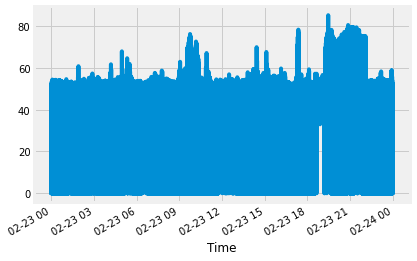

In [3]:
(data['Coolness_RHEED']).plot()

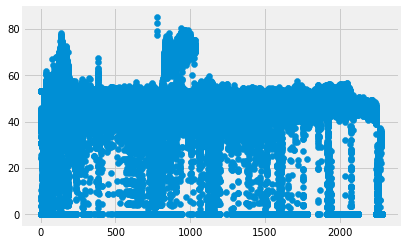

In [4]:
plt.scatter(data['Length'], data['Coolness_RHEED'])

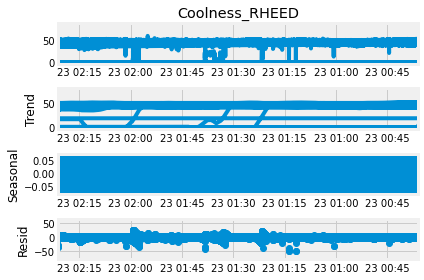

In [5]:
decomposed_coolness = sm.tsa.seasonal_decompose(data["Coolness_RHEED"],freq=240) # The frequncy is 3 times a minute
figure = decomposed_coolness.plot()
plt.show()

,Coolness_RHEED,R FWHM_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Filtered Rate,Length,Raw Rate,Source Power
Time,,,,,,,,,
2021-02-23 02:21:05,0.0,0.0,0.0,0.0,1.0,6.000,0.003721,5.990,21.64
2021-02-23 02:21:06,0.0,0.0,0.0,0.0,1.0,6.094,0.028870,6.110,21.06
2021-02-23 02:21:07,0.0,0.0,0.0,0.0,1.0,6.082,0.040400,6.168,20.97
2021-02-23 02:21:08,0.0,0.0,0.0,0.0,1.0,6.168,0.067750,6.156,20.70
2021-02-23 02:21:09,0.0,0.0,0.0,0.0,1.0,6.168,0.083560,6.145,20.60


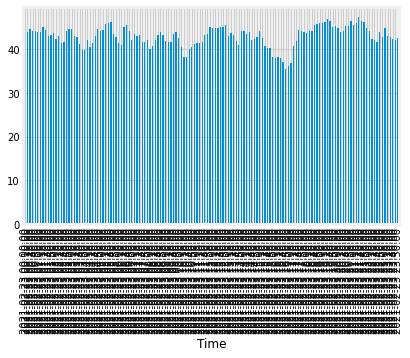

In [6]:
data['Coolness_RHEED'].resample('10min').mean().plot(kind='bar')
data.head()

In [7]:
data_h = data.resample('H').mean()
data_h.head()

,Coolness_RHEED,R FWHM_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Filtered Rate,Length,Raw Rate,Source Power
Time,,,,,,,,,
2021-02-23 00:00:00,43.918467,15.657263,12.587497,20.023498,inf,6.491989,876.884270,6.961512,19.156465
2021-02-23 01:00:00,43.951492,15.780112,12.675965,20.181294,inf,6.522924,896.632927,7.038413,19.127990
2021-02-23 02:00:00,42.867041,15.863597,12.673689,19.978661,inf,6.528862,876.596814,7.084470,19.187268
2021-02-23 03:00:00,41.920065,15.631934,12.458573,19.631527,inf,6.711772,854.726618,7.255185,19.726125
2021-02-23 04:00:00,42.712514,15.731766,12.604864,20.057884,inf,6.753357,800.725279,7.256337,19.957942


NameError: name 'pyplot' is not defined

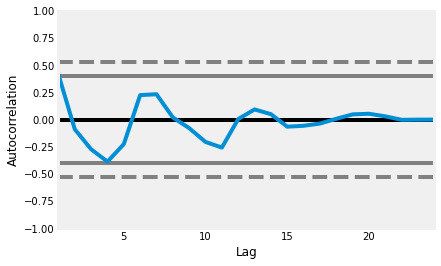

In [8]:
autocorrelation_plot(data_h['Coolness_RHEED'])
pyplot.show()
# this plot means P will be less than 5

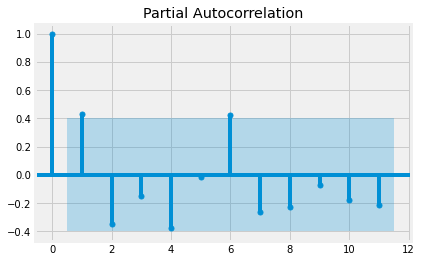

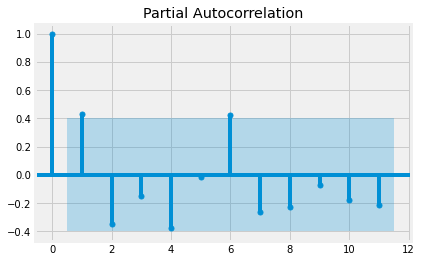

In [9]:
plot_pacf(data_h['Coolness_RHEED'], lags=11)
# q can be 1 or 3 or 4

In [ ]:
# Forecasting and predicting coolness
ps = range(10)
ds = [1]
qs = range(10)
for p in ps:
    for d in ds:
        for q in qs:
            try:
                print(p, d, q)
                model = ARIMA(data_h['Coolness_RHEED'], order = (p, d, q))
                model_fit = model.fit()
                model_fit.summary()
                model_fit.plot_predict(dynamic=False)
                plt.show()
            except Exception:
                pass
# the best is 0 1 1 (6 0 6 good 4 0 2)

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
%matplotlib inline
plt.style.use('Solarize_Light2')
sns.set_context(
    "notebook",
    rc={
        "figure.figsize": (17, 8),
        "axes.titlesize": 18
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 17, 8

%config InlineBackend.figure_format = 'retina'

In [10]:
model = ARIMA(data_h['Coolness_RHEED'], order = (0, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.Coolness_RHEED   No. Observations:                   23
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -49.593
Method:                       css-mle   S.D. of innovations              2.089
Date:                Wed, 24 Feb 2021   AIC                            105.185
Time:                        14:06:48   BIC                            108.592
Sample:                    02-23-2021   HQIC                           106.042
                         - 02-23-2021                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0378      0.370     -0.102      0.919      -0.763       0.687
ma.L1.D.Coolness_RHEED    -0.1585      0.343     -0.463      0.644      -0.830       0.513
    

In [ ]:
print(model.predict([0, 1, 1], start=10000, end=10435))

In [ ]:
#rmse = math.sqrt(mean_squared_error(data['Coolness_RHEED'].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
sklearn.metrics.roc_auc_score(data['Coolness_RHEED'].[700:1001].values, result.predict(start=700,end=1000))

In [8]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy
from pandas import datetime

In [10]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]


In [13]:
data['Coolness_RHEED'].describe()

count    2.363772e+06
mean     4.301308e+01
std      1.162788e+01
min      0.000000e+00
25%      4.380000e+01
50%      4.580000e+01
75%      4.740000e+01
max      8.520000e+01
Name: Coolness_RHEED, dtype: float64

In [ ]:
# load dataset
series = data['Coolness_RHEED']
# seasonal difference
X = series.values
days_in_year = 50
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(X, order=(0,1,1))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
# one-step out of sample forecast
start_index = len(X)
end_index = len(X) + 445
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
forecast

In [6]:
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
# fit model
model = SARIMAX(data['Coolness_RHEED'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=True)
# make prediction
yhat = model_fit.predict(len(data1), len(data1) + 435)
print(yhat)

Time
2021-02-23 02:22:44    0.0
2021-02-23 02:22:45    0.0
2021-02-23 02:22:46    0.0
2021-02-23 02:22:47    0.0
2021-02-23 02:22:48    0.0
                      ... 
2021-02-23 02:29:55    0.0
2021-02-23 02:29:56    0.0
2021-02-23 02:29:57    0.0
2021-02-23 02:29:58    0.0
2021-02-23 02:29:59    0.0
Name: predicted_mean, Length: 436, dtype: float64


In [8]:
yhat.value_counts()

0.0    436
Name: predicted_mean, dtype: int64